# An Analysis of NHS Primary Care Prescribing Information 

In order to ensure a resiliantly resourced NHS an analysis of primary care prescribing was comissioned in order to identify any efficencies that could be made. 

The following analysis is based on the 2018 GP Prescribing Dataset (2018)


## This first section of code will deal with importing the packages needed as well as importing datasets

In [1]:
# Prior to starting any analysis its good practice to import all libraries first
import pandasql as psql
import numpy as np 
import pandas as pd 

In [2]:
#Setting working directorty 
%cd /Users/imzy/Desktop/Python/Prescribe
! pwd

/Users/imzy/Desktop/Python/Prescribe
/Users/imzy/Desktop/Python/Prescribe


In [8]:
#Importing Datasets
#The practice name dataset has no header so we create one
practice_names= pd.read_csv("prac_names.csv",names =["Year", "Practice_ID", "Pract_name", "Add_1","Add_2","City","Region","Post_Code"],skipinitialspace=True)

#We need to get rid of trailing white spaces
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

def make_int(text):
    return int(text.strip('" '))

practice_names_edit = pd.read_table("prac_names.csv", sep=r',',
                      names=["Year", "Practice_ID", "Pract_name", "Add_1","Add_2","City","Region","Post_code"],
                      converters = {'Year' : strip,
                                    'Practice_ID' : strip,
                                    'Prac_name' : strip,
                                    'Add_1' : strip,
                                    'Add_2': strip,
                                    'City': strip,
                                    'Region':strip,
                                    'Post_code':strip
                                   })
display(practice_names_edit.head(5)) 


,Year,Practice_ID,Pract_name,Add_1,Add_2,City,Region,Post_code
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [9]:
## Importing BNF Code lookup table 
chem_names = pd.read_csv("chem_names.csv")
display(chem_names.head(3))


,CHEMSUB,NAME,
0,0101010A0,Alexitol Sodium ...,NaN
1,0101010B0,Almasilate ...,NaN
2,0101010C0,Aluminium Hydroxide ...,NaN


In [10]:
# Importing the practice prescribing dataset 
prac_pres = pd.read_table("prac_pres.csv",sep=r',')

prac_pres.rename(columns={"BNF CODE": "BNF_CODE", "BNF NAME                                    ":"BNF_NAME", "ITEMS  ": "ITEMS", "NIC        ": "NIC", "ACT COST   ": "ACT_COST"}, inplace = True) 
display(prac_pres.head(5)) 




,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804,
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804,
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804,
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804,
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804,


In [83]:
#importing demographics dataset

prac_demo = pd.read_csv("prac_demo.csv",skipinitialspace=True)
display(prac_demo.head(5))

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


In [12]:
from pandasql import PandaSQL
pdsql = PandaSQL()
##After inspecting the practice names dataset we notice missing values for region
missing_region= pdsql("SELECT COUNT(DISTINCT Practice_ID) as counter FROM practice_names where Region is null ;")
print(missing_region)


   counter
0     1918


# Question 1 A

Identify all GP practices located in London. 

Answer:
In order to get the most accurate number it is better to take advantage of the CCG codes to identify practices as opposed to specifying a city or region 

In [13]:
london = pdsql("select distinct(CODE) as Practice_ID from prac_demo where CCG_CODE in('07L','07M','07N','07P','07Q','07R','09A','07T','07V','07W','07X','08A','08C','08D','08E','08F','08G','07Y','08H','08J','08K','08L','08R','08M','08N','08P','08Q','08T','08V','08W','08X','08Y');")
practices_in_london=pdsql("select count(Practice_ID) as number_of_practices_in_london from london;")
display(practices_in_london)

,number_of_practices_in_london
0,1323


## Question 1 B What is the Total number of patients registerd at london GP 

Answer:
We can take advantage of the practice ID's already identified and use a SQL subquery to avoid any messy joins 

In [14]:
total_london=pdsql('select sum(NUMBER_OF_PATIENTS) as total_london_pats from prac_demo where code in (select Practice_ID from london);')
display(total_london)

,total_london_pats
0,9851208


# Question 1C What is  The total number of prescriptions for patients in London 

Answer: 
We can take advantage of the items column and perform a simple summation 

In [16]:
total_prescriptions =pdsql("select sum(ITEMS) AS total_prescriptions from prac_pres where PCT in('07L','07M','07N','07P','07Q','07R','09A','07T','07V','07W','07X','08A','08C','08D','08E','08F','08G','07Y','08H','08J','08K','08L','08R','08M','08N','08P','08Q','08T','08V','08W','08X','08Y');")
display(total_prescriptions)

,total_prescriptions
0,10528133


# Question 1D What is the total actual cost of these prescriptions (using the ACT COST column) 
    
Answer:
The total cost for all ites is already reflected in the actual cost column  
therefore the total cost of prescription is sum of total costs 

In [18]:
#First step is to select all data for london practices to save time 
london_pres_data = pdsql("select * from prac_pres where PCT in ('07L','07M','07N','07P','07Q','07R','09A','07T','07V','07W','07X','08A','08C','08D','08E','08F','08G','07Y','08H','08J','08K','08L','08R','08M','08N','08P','08Q','08T','08V','08W','08X','08Y');")

In [33]:
display(london_pres_data.head(5))

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,,total_cost
0,Q61,07L,F82001,0101010L0BEAAAI,Maalox Plus_Susp,1,2.91,2.71,250,201804,,2.71
1,Q61,07L,F82001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,19.28,17.89,60,201804,,17.89
2,Q61,07L,F82001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,2,27.75,25.76,1800,201804,,25.76
3,Q61,07L,F82001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),10,56.32,52.36,5500,201804,,52.36
4,Q61,07L,F82001,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,13,82.92,77.26,7650,201804,,77.26


In [30]:
#Firstly lets create a column that calculates the total cost for all each drug 
london_pres_data['total_cost'] =london_pres_data['ACT_COST']

In [31]:
display(london_pres_data.head(5))

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,,total_cost
0,Q61,07L,F82001,0101010L0BEAAAI,Maalox Plus_Susp,1,2.91,2.71,250,201804,,2.71
1,Q61,07L,F82001,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,19.28,17.89,60,201804,,17.89
2,Q61,07L,F82001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,2,27.75,25.76,1800,201804,,25.76
3,Q61,07L,F82001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),10,56.32,52.36,5500,201804,,52.36
4,Q61,07L,F82001,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,13,82.92,77.26,7650,201804,,77.26


In [32]:
#Now we simply sum the total_cost coulmn to get our answer
total_cost_london = london_pres_data['total_cost'].sum()
print(total_cost_london)

77495848.00999998


# Question 1e: What are the top 10 most freequent drugs prescribed in london 

Answer:
We can take advantage of the BNF code as its a unique identifyer of each drug in the NHS styste,. 

In [35]:
# first lets find out the total quantity prescribed by medication  
Total_presc_ldn = pdsql('select distinct(BNF_CODE) as BNF_CODE, sum(ITEMS) as SUM_ITEMS from london_pres_data group by 1 order by 2 desc;')
display(Total_presc_ldn.head(5))

,BNF_CODE,SUM_ITEMS
0,0103050P0AAAAAA,240428
1,0601022B0AAABAB,208255
2,0206020A0AAAAAA,198459
3,0212000B0AAABAB,182861
4,0209000A0AAABAB,168718


In [36]:
#Now we will use our lookup table to create a join and generate the top ten drugs presecibed in london
top_drugs_ldn = pdsql("select a.*, b.BNF_NAME from Total_presc_ldn a left outer join london_pres_data b on a.BNF_CODE = b.BNF_CODE group by a.BNF_CODE order by 2 desc;")
display(top_drugs_ldn.head(10))

,BNF_CODE,SUM_ITEMS,BNF_NAME
0,0103050P0AAAAAA,240428,Omeprazole_Cap E/C 20mg
1,0601022B0AAABAB,208255,Metformin HCl_Tab 500mg
2,0206020A0AAAAAA,198459,Amlodipine_Tab 5mg
3,0212000B0AAABAB,182861,Atorvastatin_Tab 20mg
4,0209000A0AAABAB,168718,Aspirin Disper_Tab 75mg
5,0206020A0AAABAB,155712,Amlodipine_Tab 10mg
6,0212000B0AAACAC,152073,Atorvastatin_Tab 40mg
7,0103050L0AAAAAA,150071,Lansoprazole_Cap 30mg (E/C Gran)
8,0301011R0AAAPAP,142599,Salbutamol_Inha 100mcg (200 D) CFF
9,0407010H0AAAMAM,123929,Paracet_Tab 500mg


## Analysis:

The most common prescriptions appear to be related to chronic condtions and illnesses associated with age
The top ten prescroptions are used to treat diabeties, high blood pressure, high cholesterol and asthma 

# Question 1F: What where the 10 least prescribed drugs in london 

Answer: 
To solve this question we can use the previous table (top_drugs_ldn) and sort by the opposite order


In [37]:
bottom_drugs_ldn = pdsql('select * from top_drugs_ldn group by BNF_CODE order by 2 ;')
display (bottom_drugs_ldn.head(10))


,BNF_CODE,SUM_ITEMS,BNF_NAME
0,0101010I0AAABAB,1,Mag Ox_Cap 100mg
1,0101010I0AAALAL,1,Mag Ox_Tab 160mg
2,0101010P0AAAAAA,1,Co-Simalcite_Susp 125mg/500mg/5ml S/F
3,0101010U0AAAAAA,1,Sod Cit_Oral Soln 441.17mg/5ml
4,0101012B0BFAABW,1,S-Bicarb_Oral Soln 420mg/5ml
5,010102100BBBDAI,1,Pepto-Bismol_Tab 262.5mg Chble
6,0101021B0BEABAG,1,Gaviscon_Tab Chble 500mg (Peppermint)
7,0101021B0BEAPA0,1,Gaviscon Cool_Tab Chble 250mg (P/Mint)
8,0101021C0BBAAAF,1,Tums_Assorted Fruit Antacid Tab
9,0102000AKAAABAB,1,Eluxadoline_Tab 75mg


## Analysis 

The ten least items prescribed appear to be related to generally self limiting conditions that patients are generally available over the counter. 

These include condtions such as alergies, acid refulx and diarrhea


# Question 2 Repeat the previous instructions, this time for the city of Cambridge. Discuss and compare your findings with the answers for London in question 1 above using descriptive statistics.


## Question 2a how many practices in the city of cambridge 

Answer:

In [38]:
#We create a with all practice codes in the cambridge and petsboroug area.
camb_prac_codes = pdsql("select code as practice_id from prac_demo where CCG_CODE = '06H' ;")

#Nect we can query the practice names dataset and use the above as a sub query 
camb_practices = pdsql("select * from practice_names_edit where Practice_ID in (select practice_id from camb_prac_codes) and city ='CAMBRIDGE';")

##The total number of practices in Cambridge is therefore 
prac_in_camb =pdsql('select count(distinct Practice_ID) as total_practices_in_cambridge from camb_practices;')
display(prac_in_camb)                       

,total_practices_in_cambridge
0,30


# Question 2b: What is the total number of patients in cambridge 

Answer:

In [39]:
total_camb=pdsql('select sum(NUMBER_OF_PATIENTS) as total_camb_patients from prac_demo where code in (select Practice_ID from camb_practices);')
display(total_camb)

,total_camb_patients
0,300885


# Question 2c: What is the total number of prescriptiins in cambridge

Answer:

In [40]:
total_prescriptions_camb =pdsql("select sum(ITEMS) AS total_prescriptions from prac_pres where PRACTICE in(select practice_id from camb_prac_codes);")
display(total_prescriptions_camb)

,total_prescriptions
0,1392205


# Question 2d: What is the total actual cost of these prescriptions (using the ACT COST column) for cambridge

Answer:
The total cost is the summation of the actual cost for each drug 

In [42]:
#First we will create a subset of the prac_pres dataset 
camb_pres= pdsql("select  * from prac_pres where PRACTICE in(select practice_id from camb_prac_codes);")


In [43]:
#now we calculate the total cost as sum(actual costs)
camb_pres['total_cost']=camb_pres['ACT_COST']
camb_cost = camb_pres['total_cost'].sum()
print(camb_cost)

9272978.659999998


# Question 2e: What are the top 10 most freequent drugs prescribed in cambridge?

Answer:

In [46]:
# first lets find out the total quanity per prescription 
Total_presc_camb = pdsql('select distinct(BNF_CODE) as BNF_CODE, sum(ITEMS) as SUM_ITEMS from camb_pres group by 1 order by 2 desc;')
display(Total_presc_camb.head(5))

,BNF_CODE,SUM_ITEMS
0,0103050P0AAAAAA,45947
1,0209000A0AAABAB,26714
2,0212000B0AAABAB,25623
3,0206020A0AAAAAA,24582
4,0407010H0AAAMAM,18854


In [48]:
#Now we will use our lookup table to create a join and generate the top ten drugs presecibed in london
top_drugs_cam = pdsql("select a.*, b.BNF_NAME from Total_presc_camb a left outer join camb_pres b on a.BNF_CODE = b.BNF_CODE group by a.BNF_CODE order by 2 desc;")
display(top_drugs_cam.head(10))

,BNF_CODE,SUM_ITEMS,BNF_NAME
0,0103050P0AAAAAA,45947,Omeprazole_Cap E/C 20mg
1,0209000A0AAABAB,26714,Aspirin Disper_Tab 75mg
2,0212000B0AAABAB,25623,Atorvastatin_Tab 20mg
3,0206020A0AAAAAA,24582,Amlodipine_Tab 5mg
4,0407010H0AAAMAM,18854,Paracet_Tab 500mg
5,0601022B0AAABAB,18171,Metformin HCl_Tab 500mg
6,0602010V0AABZBZ,17541,Levothyrox Sod_Tab 100mcg
7,0602010V0AABWBW,16103,Levothyrox Sod_Tab 25mcg
8,0301011R0AAAPAP,16089,Salbutamol_Inha 100mcg (200 D) CFF
9,0212000Y0AAADAD,16047,Simvastatin_Tab 40mg


## Analysis 

We notice a similar distribution of prescriptions in cambridge and london 
a key difference appears to be the prescription of drugs for thyroid related disorders.  

# Question 2F: What are the bottom 10 less frequent drugs prescribed

Answer

In [49]:
bottom_drugs_cam = pdsql('select * from top_drugs_cam group by BNF_CODE order by 2 ;')
display (bottom_drugs_cam.head(10))

,BNF_CODE,SUM_ITEMS,BNF_NAME
0,0101010F0AAAUAU,1,Mag Carb_Heavy Cap 500mg
1,0101010I0AAACAC,1,Mag Ox_Cap 160mg
2,0101010I0AAAYAY,1,Mag Ox_Cap 500mg
3,0101010I0BEAAAC,1,Oromag 160_Cap
4,0101010N0AAABAB,1,Antacid/Oxetacaine_Oral Susp
5,0101010R0AAAEAE,1,Simeticone_Tab Chble 125mg
6,0101010R0AAAHAH,1,Simeticone_Cap 125mg
7,0101010R0BHAAAA,1,WindSetlers_Cap 100mg
8,0101012B0BIAAAB,1,Thamicarb_Oral Soln 84mg/ml
9,010102100AAAIAI,1,Bism Subsalic_Tab 262.5mg Chble S/F


## Analysis 

We see a similar distribution of prescriptions as london 

# Comparison of london and cambridge prescribing information 


As can be expected london has significantly more practices and patients than cambridge 

In [50]:
display(practices_in_london)
display ( prac_in_camb)


,number_of_practices_in_london
0,1323


,total_practices_in_cambridge
0,30


The number of patients is also significantly larger in London versus cambridge 

In [51]:
display(total_london)
display(total_camb)

,total_london_pats
0,9851208


,total_camb_patients
0,300885


The average cost of a prescription in london is: 

In [69]:
ave_cost_prescription_london = total_cost_london/total_prescriptions
print(ave_cost_prescription_london)

   total_prescriptions
0             7.360835


The average cost of prescription in london is 7.36

The average cost per prescription in cambridge is:

In [71]:
ave_cost_prescription_camb = camb_cost/total_prescriptions_camb
display(ave_cost_prescription_camb)

,total_prescriptions
0,6.660642


## Analysis 

We can see that the average cost per patient registed is lower than that of London. 
This is potentially due to different population sturctures and health needs in each city. 

Firstly we may observe that there is a skew in age groups towards older patients in london who may require more care. 

Secondly these numbers must be taken as indicative as there is no way of standardising based on data in these CSV files. 

Descriptive statistics for this sort of analysis are somewhat problematic as they are incredibly crude, there is very little to adjust for without linking in external datasets.


# Question 3: Describe total number of prescriptions and their total actual cost (using the ACT COST column) across all practices for drugs related to: cardiovascular disease (British National Formulary chapter 2) and antidepressants (British National Formulary chapter 4.3)

Answer:
We can take advantage of the BNF coding structure to do this 
all drugs from chapter 2 will start with code 02 and 0403 for chapter 4.3


In [72]:
#First we create two new tables one for CVD drugs the other for anti depresants 

cardio_drugs = pdsql('select * from prac_pres where BNF_CODE like ("02%");')
anti_dep_drugs = pdsql('select * from prac_pres where BNF_CODE like ("0403%");')



In [79]:
# now we can conduct the calculations rather easily 
sum_cvd_drugs_prescribed= cardio_drugs['ITEMS'].sum()
total_cost_cvd_drugs = cardio_drugs['ACT_COST'].sum()
ave_cost_cvd=total_cost_cvd_drugs/sum_cvd_drugs_prescribed
sum_anti_dep_drugs_prescribed = anti_dep_drugs['ITEMS'].sum()
total_cost_anti_dep_drugs = anti_dep_drugs['ACT_COST'].sum()
ave_cost_anti_dep = total_cost_anti_dep_drugs/sum_anti_dep_drugs_prescribed



The total number of drugs for cardio vascular disease prescribed across the IKL where 

In [75]:
print(sum_cvd_drugs_prescribed)

26449832


The total cost of these prescriptions where 

In [76]:
print(total_cost_cvd_drugs)

90193834.01999994


The average cost of one of these CVD drugs is

In [80]:
print(ave_cost_cvd)

3.4099964801288696


The total number of antidepresent drugs prescribed across the UK where 

In [77]:
print(sum_anti_dep_drugs_prescribed)

5715873


the total cost of these prescriptions where 

In [78]:
print(total_cost_anti_dep_drugs)

16853470.86


the average cost for an antidepresent drug is 

In [81]:
print(ave_cost_anti_dep)

2.9485383702542025


## Analysis 

We can see that there is a higher number of prescriptions for CVD drugs than ANTIDEP drugs and that the 
average price of a prescrtion is of an antipdep is lower than a CVD. 

Once again this is a rather crude analysis and must be treated as such 

# Question 4:
Describe the total spending and the relative costs per patient across all practices for   
the month of April 2018:

In [84]:
# first lets get the number of patients in each practice
num_patients_per_practice = pdsql('select distinct(CODE) as PRACTICE, NUMBER_OF_PATIENTS FROM prac_demo GROUP BY 1;')

In [85]:
# now we will get the total cost per practice 
costs_per_practice =pdsql('select distinct(PRACTICE) as PRACTICE, sum(ACT_COST) as total_cost from prac_pres group by 1;')

In [88]:
# now we will link these two datasets together so we have for each practice total pats and total cost 
pats_cost_prac = pdsql('select a.*, b.total_cost from num_patients_per_practice a left outer join costs_per_practice b on a.PRACTICE = b.PRACTICE;')

In [89]:
# now we can calculate the cost per registered pat 
pats_cost_prac['cost_per_pat']=pats_cost_prac['total_cost']/pats_cost_prac['NUMBER_OF_PATIENTS']

In [178]:
# now we drop all missing values due to dirty data 
pats_cost_prac_clean = pdsql('select * from pats_cost_prac where total_cost is not null; ')

display(pats_cost_prac_clean.head(10))




,PRACTICE,NUMBER_OF_PATIENTS,total_cost,cost_per_pat
0,A81001,4086,52194.63,12.774016
1,A81002,19906,268607.26,13.493784
2,A81004,10165,139115.40,13.685726
3,A81005,8016,102914.06,12.838580
4,A81006,14497,183226.79,12.638945
5,A81007,9999,113105.27,11.311658
6,A81009,8804,105172.22,11.945959
7,A81011,11944,152269.65,12.748631
8,A81012,5005,83576.25,16.698551
9,A81013,6418,76632.42,11.940234


In [177]:
#In order to visualise we need to import matplotlib
import matplotlib.pyplot as plt

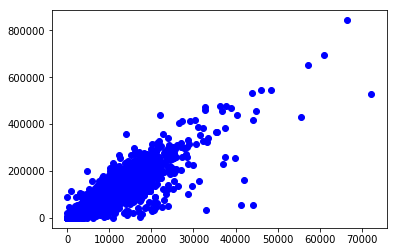

In [179]:
## first we will desctbe the relationship between number of patients and total cost 

x = pats_cost_prac_claean['NUMBER_OF_PATIENTS']
y = pats_cost_prac_claean['total_cost']

plt.plot(x, y, 'o', color='blue');


## Analysis 

As can be expected there is a linear relationship between the number of patients    
registerd at a practice and the total prescribing cost for each practice. 

The recomended approach of showing the cost per registerd patient is demonstrated below however it is rather problematic and rather crude. The reasons for which are described further in this document. 

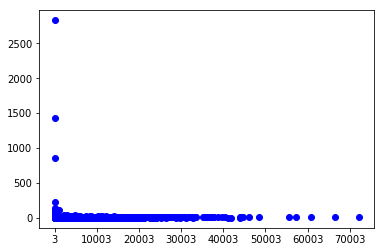

In [206]:
## first we will desctbe the relationship between number of patients and total cost 
x = pats_cost_prac_claean['NUMBER_OF_PATIENTS']
y = pats_cost_prac_claean['cost_per_pat']
y2=pd.to_numeric(y)

plt.plot(x, y2, 'o', color='blue');
plt.xticks(np.arange(min(x), max(x)+1, 10000.0))

plt.show()

in the above graph we can see that as the number of registerd patients increases
the relative cost per patient decreases. 

The above relationship however dosen't take into account any confounding factos as they arent availble in the dataset 

